In [80]:
import pandas as pd
import numpy as np

data = pd.read_csv("database.csv", low_memory=False)
df = pd.DataFrame(data)
df.replace('Unknown',np.nan, inplace='true')
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,NaN,Male,15,Native American/Alaska Native,NaN,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,NaN,Male,42,White,NaN,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,NaN,Male,42,White,NaN,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,NaN,NaN,0,NaN,NaN,NaN,NaN,0,1,FBI


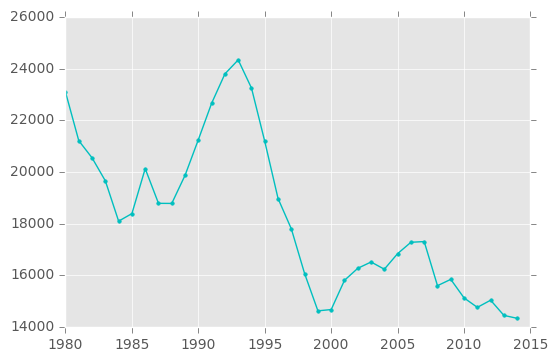

In [81]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

g = df.groupby('Year')
years = sorted(g.groups.keys())
size = g.size().values.ravel()
fig, ax = plt.subplots()
ax.plot(years, size, marker='.', linestyle='-', ms=5, color = 'c')
plt.show()
plt.close("all")

In [82]:
g1 = df.groupby(['Year','Relationship'])
g1 = g1.size()
df2 = pd.DataFrame(index = years, columns = ['Stranger', 'Acquaintance', 'Other'])
stranger = []
acq= []
other = []
y = 1980
s = 0
for index, series in g1.iteritems():
    
    if(index[1] == 'Stranger'):
        stranger.append(series)
    elif (index[1] == 'Acquaintance'):
        acq.append(series)
    else:
        s += series
    if(y == index[0]-1):
        y += 1
        other.append(s)
        s = 0
other.append(s)        
df2['Stranger'] = stranger
df2['Acquaintance'] =  acq
df2['Other'] = other


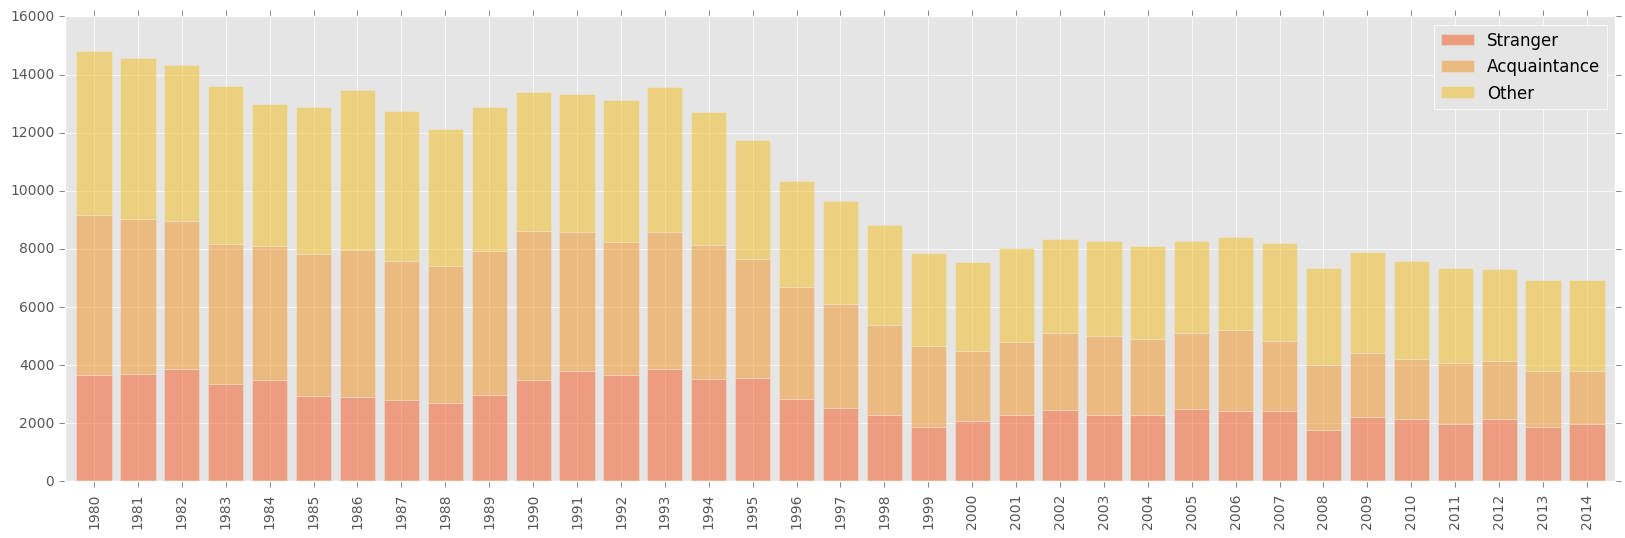

In [83]:
f, ax1 = plt.subplots(1, figsize=(20,6))
df2.plot.bar(stacked=True,ax=ax1, alpha = .5, width = .8, color =['#F4561D','#F1911E','#F1BD1A'])
plt.show()

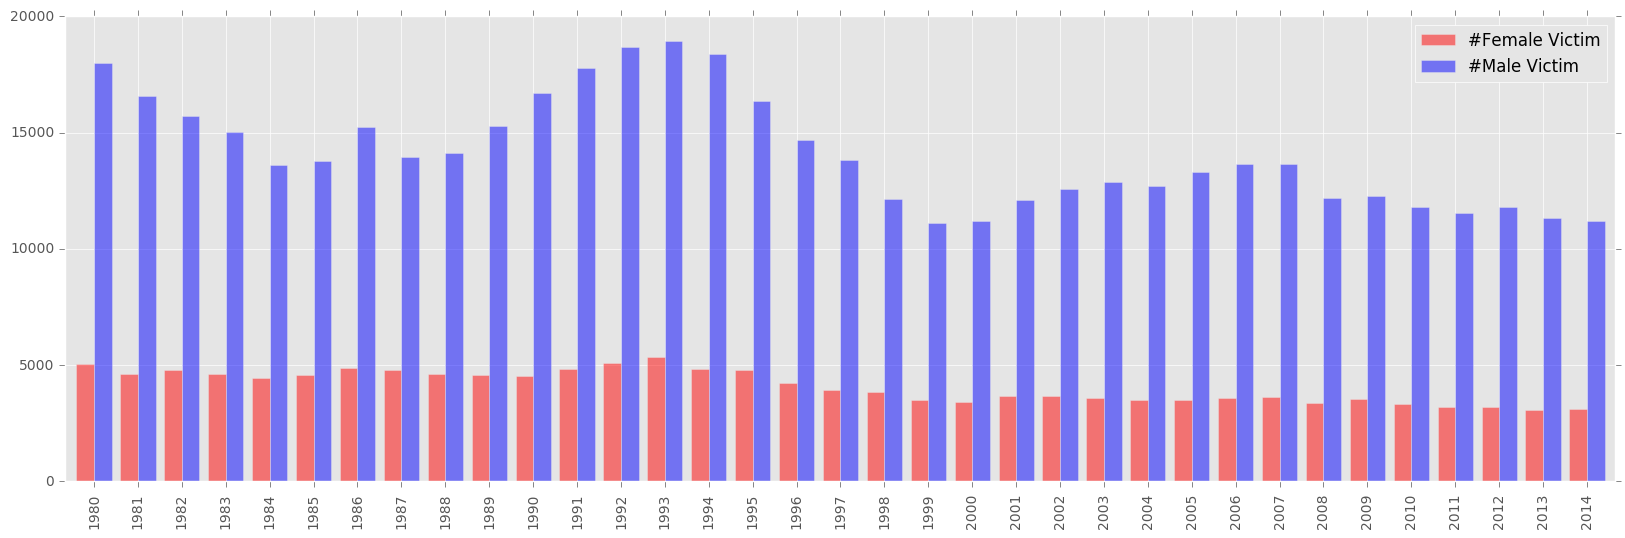

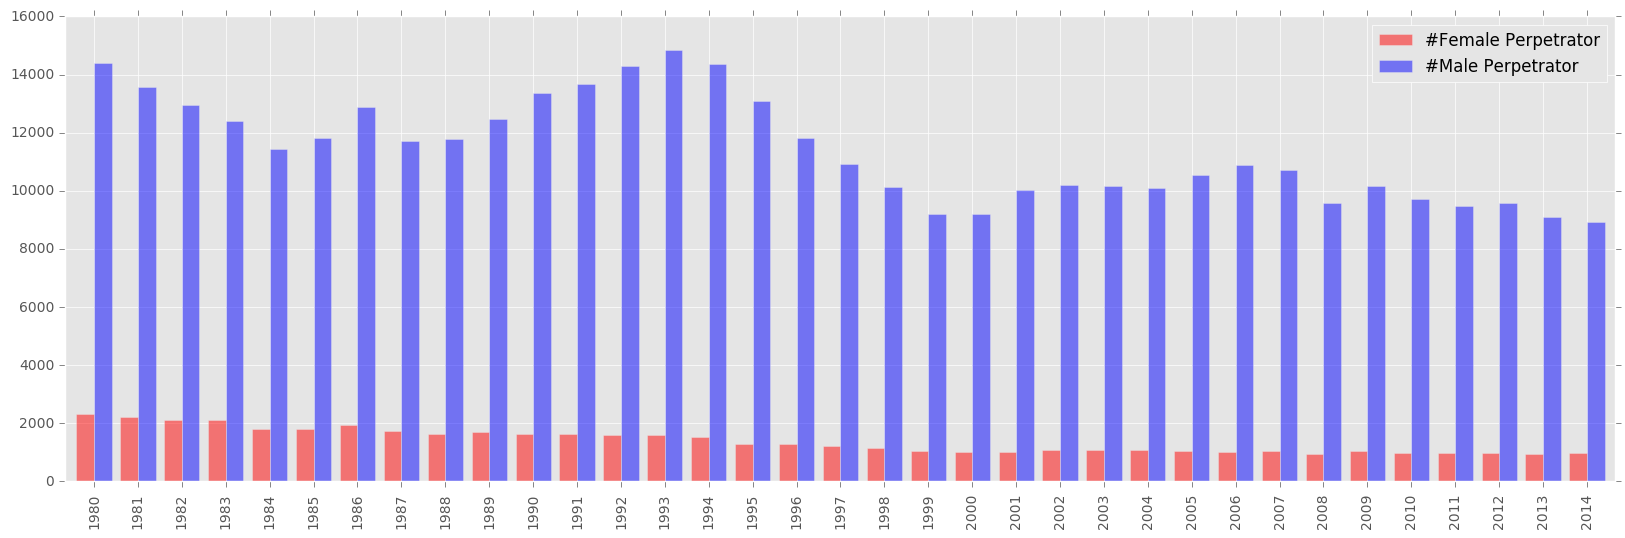

In [84]:
g2 = df.groupby(['Year','Victim Sex'])
#reshape panda series to one column of # of Female Victim and one column of # Male Victim 
g2 = g2.size().values.reshape(35,2)
df3 = pd.DataFrame(index = years, columns =['#Female Victim','#Male Victim'], data=g2)

f, ax2 = plt.subplots(1, figsize=(20,6))
df3.plot.bar(ax=ax2, color=['r','b'],alpha=0.5, width=0.8)

g3 = df.groupby(['Year','Perpetrator Sex'])
g3 = g3.size().values.reshape(35,2)
df4 = pd.DataFrame(index = years, columns =['#Female Perpetrator','#Male Perpetrator'], data=g3)

f, ax3 = plt.subplots(1, figsize=(20,6))
df4.plot.bar(ax=ax3, color=['r','b'],alpha=0.5, width=0.8)
plt.show()

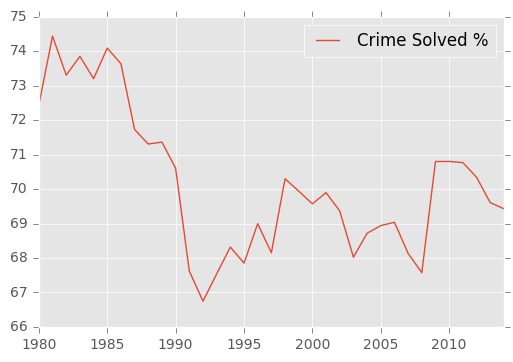

In [86]:
g4 = df.groupby(['Year','Crime Solved'])
#reshape panda series to one column of # of Female Victim and one column of # Male Victim 
g4 = g4.size().values.reshape(35,2)
df5 = pd.DataFrame(index = years, columns =['#Not Solved','#Solved'], data=g4)
df5['Crime Solved %'] = (df5['#Solved']/(df5['#Solved']+df5['#Not Solved'])*100)

df5.plot(x=df5.index, y='Crime Solved %')
plt.show()